<a href="https://colab.research.google.com/github/Dkepffl/2022-2-ESAA/blob/main/Project(2)/RFM_%ED%95%A9%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 출력 결과를 셀 아래 inline으로 표시
%matplotlib inline

## **데이터셋 불러오기**

In [28]:
df=pd.read_csv('/content/drive/MyDrive/22-2 ESAA OB 1조/OB 프로젝트(2)/Data/marketing_campaign.csv', sep='\t')

In [29]:
# load data
df = pd.read_csv('/content/drive/MyDrive/22-2 ESAA OB 1조/OB 프로젝트(2)/Data/marketing_campaign.csv', sep='\t') # 구분자가 tab 키

In [30]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **데이터 전처리 및 가공**

### **RFM 기반으로 데이터 가공**
* Recency: 주문 기간
* Frequency :  주문 횟수
* Monetary : 주문 금액
- 아래와 같이 기존 컬럼들을 재구성하여, Recency, Frequency, Monetary 컬럼을 생성한다.
  1. Recency : 기존 `Recency` 컬럼을 그대로 사용한다.
  2. Frequency : `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` 컬럼을 더하여 생성한다.
  3. Monetary : 각 상품별 주문 금액을 의미하는 `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` 컬럼을 모두 더하여 생성한다. 


In [32]:
# 빈 데이터 프레임 생성
df_RFM = pd.DataFrame(columns={'ID', 'Recency', 'Frequency', 'Monetary'})
df_RFM = df_RFM[['ID','Recency', 'Frequency', 'Monetary']]
df_RFM

,ID,Recency,Frequency,Monetary


In [33]:
# ID
df_RFM['ID'] = df['ID'].copy()
df_RFM.head()

,ID,Recency,Frequency,Monetary
0,5524,NaN,NaN,NaN
1,2174,NaN,NaN,NaN
2,4141,NaN,NaN,NaN
3,6182,NaN,NaN,NaN
4,5324,NaN,NaN,NaN


In [34]:
# Recency
df_RFM['Recency'] = df['Recency'].copy()
df_RFM.head()

,ID,Recency,Frequency,Monetary
0,5524,58,NaN,NaN
1,2174,38,NaN,NaN
2,4141,26,NaN,NaN
3,6182,26,NaN,NaN
4,5324,94,NaN,NaN


In [35]:
# Frequency
df_RFM['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df_RFM.head()

,ID,Recency,Frequency,Monetary
0,5524,58,22,NaN
1,2174,38,4,NaN
2,4141,26,20,NaN
3,6182,26,6,NaN
4,5324,94,14,NaN


In [36]:
# Monetary
df_RFM['Monetary'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df_RFM.head()

,ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422


### **각 컬럼별 이상치 제거**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


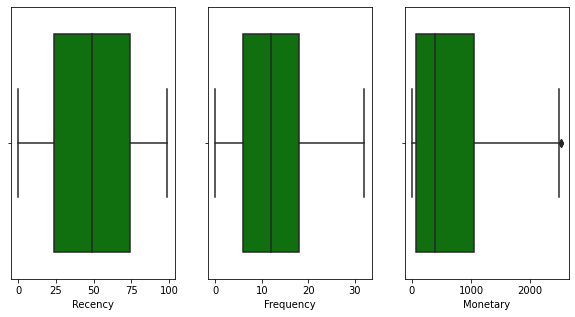

In [37]:
# boxplot
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
sns.boxplot(df_RFM['Recency'], color='g')

plt.subplot(1, 3, 2)
sns.boxplot(df_RFM['Frequency'], color='g')

plt.subplot(1, 3, 3)
sns.boxplot(df_RFM['Monetary'], color='g')

plt.show()

- Monetary 컬럼에만 이상치가 존재한다.

In [38]:
Q1 = df_RFM['Monetary'].quantile(0.25)
Q3 = df_RFM['Monetary'].quantile(0.75)
IQR = Q3-Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

idx = list(df_RFM[(df_RFM['Monetary'] > upper) | (df_RFM['Monetary']<lower)].index)
df_RFM.drop(idx, axis=0, inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


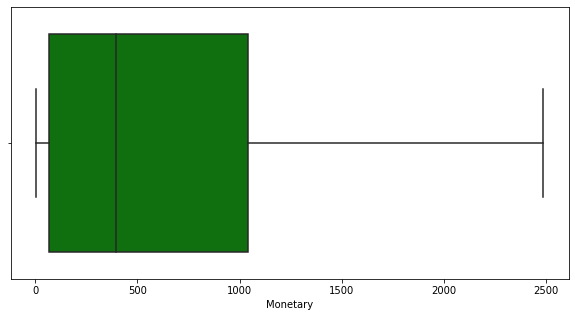

In [39]:
# boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df_RFM['Monetary'], color='g')
plt.show()

- 이상치가 제거된 것을 확인할 수 있다.

### **각 컬럼별 분포 확인**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

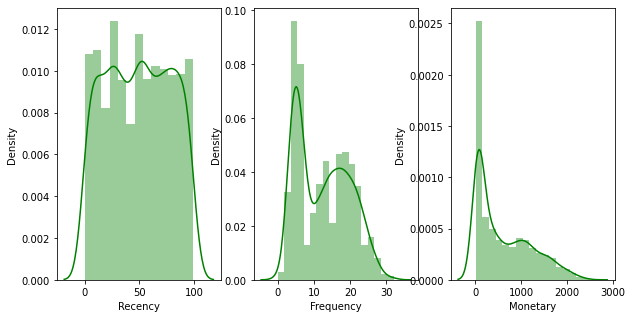

In [40]:
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
sns.distplot(df_RFM['Recency'], color='g')

plt.subplot(1, 3, 2)
sns.distplot(df_RFM['Frequency'], color='g')

plt.subplot(1, 3, 3)
sns.distplot(df_RFM['Monetary'], color='g')

plt.show()

- Frequency와 Monetary 컬럼에 로그 변환을 적용한다.

In [41]:
# 로그 변환
df_RFM['Frequency_log'] = np.log1p(df_RFM['Frequency'])
df_RFM['Monetary_log'] = np.log1p(df_RFM['Monetary'])

### **스케일링**

In [42]:
from sklearn.preprocessing import StandardScaler

X_features = df_RFM[['ID','Recency', 'Frequency_log', 'Monetary_log']].values
scaler = StandardScaler()
scaler.fit(X_features)
X_features_scaled = scaler.transform(X_features)

## **K-Means 알고리즘을 이용한 군집화**

#### **군집 개수별 실루엣 계수 시각화 함수**

In [74]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        km=KMeans(n_clusters=n_cluster, random_state=0)
        cluster_labels = km.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

#### **군집 개수 최적화**
- Elbow Method, Silhouette 점수를 이용하여 최적의 군집 개수를 찾아보자.
- Elbow Method : Cluster 간의 거리 합을 의미하는 inertia가 급격히 떨어지는 지점의 K 값을 군집의 개수로 사용한다.

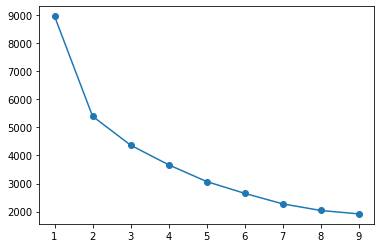

In [69]:
# Elbow Method
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,10):
  km=KMeans(n_clusters=i)
  km.fit(X_features_scaled)
  inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.show()

- Silhouette score 점수가 가장 좋은 군집 개수를 확인한다.
- 또한 각 군집 개수별 실루엣 계수를 시각화하였다.

In [72]:
# Silhouette score
from sklearn.metrics import silhouette_score
n_range=list(range(1, 10))

best_n=0
best_ss=0
for n in n_range:
  km=KMeans(n_clusters=n+1, random_state=0)
  clusters=km.fit_predict(X_features_scaled)

  score=silhouette_score(X_features_scaled, clusters)
  if score>best_ss:
    best_n=n
    best_ss=score
  
print('best cluster num:', best_n+1, ' with best silhouette score: ', best_ss)

best cluster num: 2  with best silhouette score:  0.3636798313095011


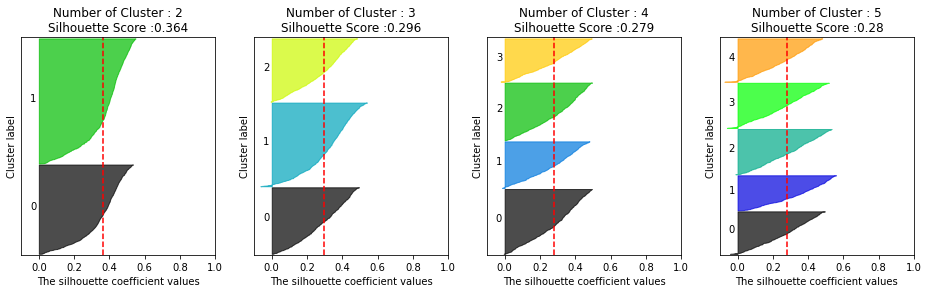

In [75]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)

- 군집 개수를 2개로 설정하기로 함

#### **군집화**

In [47]:
km=KMeans(n_clusters=2)
km.fit(X_features_scaled)

df_RFM['cluster_KMeans']=km.predict(X_features_scaled)

In [48]:
df_RFM['cluster_KMeans'].value_counts()

0    1305
1     932
Name: cluster_KMeans, dtype: int64

## **K-Means 알고리즘을 이용한 군집화 결과 시각화**

In [49]:
fig = plt.figure()

x=df_RFM['Recency']
y=df_RFM['Frequency']
z=df_RFM['Monetary']

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


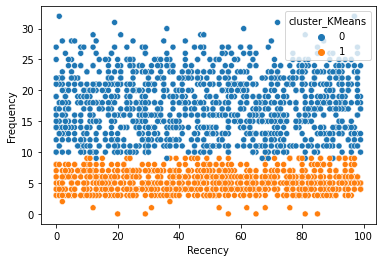

In [50]:
# Recency & Frequency
sns.scatterplot(x, y, hue=df_RFM['cluster_KMeans'])
plt.show()

- Frequency가 낮은 그룹과 높은 그룹으로 군집화되었다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


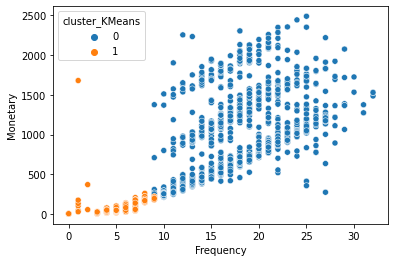

In [51]:
# Frequency & Monetary
sns.scatterplot(y,z, hue=df_RFM['cluster_KMeans'])
plt.show()

- Frequency와 Monetary 값이 모두 큰 군집과 두 값이 모두 작은 군집으로 군집화되었다.
- Frequency와 Monetary 컬럼 간에 선형 관계가 있는 것으로 보인다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


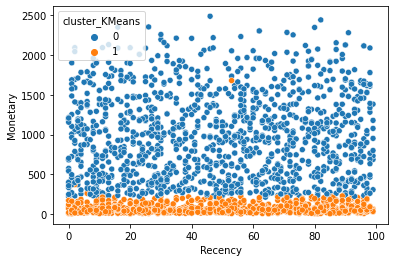

In [52]:
# Recency & Monetary
sns.scatterplot(x, z, hue=df_RFM['cluster_KMeans'])
plt.show()

- Monetary 값이 큰 군집과 작은 군집으로 군집화 되었다.

In [53]:
from mpl_toolkits.mplot3d import Axes3D

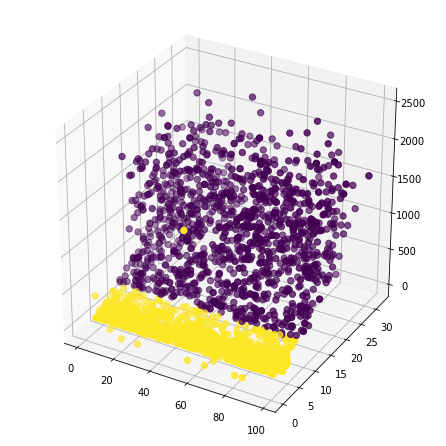

In [54]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# plot
ax.scatter(x, y, z, s=40, c=df_RFM['cluster_KMeans'], marker='o')
plt.show()

## **GMM 알고리즘을 이용한 군집화**

In [55]:
from sklearn.mixture import GaussianMixture

#### **군집 개수별 실루엣 계수 시각화 함수**

In [56]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = GaussianMixture(n_components=n_cluster)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

#### **군집 개수 최적화**

In [57]:
# Silhouette score
from sklearn.metrics import silhouette_score
n_range=list(range(1, 10))

best_n=0
best_ss=0
for n in n_range:
  gm=GaussianMixture(n_components=n+1)
  gm.fit(X_features_scaled)
  clusters=gm.predict(X_features_scaled)

  score=silhouette_score(X_features_scaled, clusters)
  if score>best_ss:
    best_n=n
    best_ss=score
  
print('best cluster num:', best_n+1, ' with best silhouette score: ', best_ss)

best cluster num: 2  with best silhouette score:  0.31328737493036923


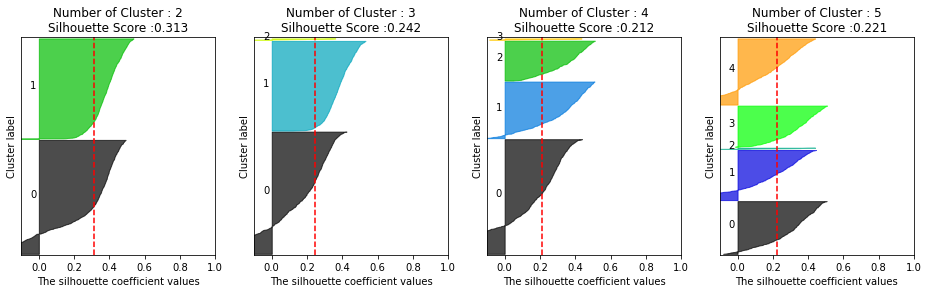

In [58]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)

- 군집 개수를 2개로 설정하기로 함

#### **군집화**

In [59]:
gm = GaussianMixture(n_components=2)
gm.fit(X_features_scaled)
gmm_labels = gm.predict(X_features_scaled)

df_RFM['cluster_GMM'] = gmm_labels

In [60]:
df_RFM['cluster_GMM'].value_counts()

1    1189
0    1048
Name: cluster_GMM, dtype: int64

## **GMM 알고리즘을 이용한 군집화 결과 시각화**

In [61]:
fig = plt.figure()

x=df_RFM['Recency']
y=df_RFM['Frequency']
z=df_RFM['Monetary']

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


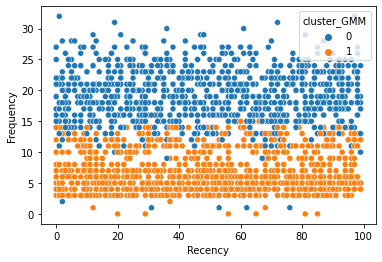

In [62]:
# Recency & Frequency
sns.scatterplot(x, y, hue=df_RFM['cluster_GMM'])
plt.show()

- Frequency가 낮은 그룹과 높은 그룹으로 군집화되었다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


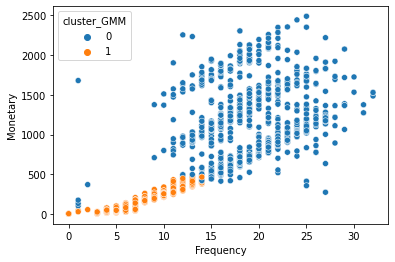

In [63]:
# Frequency & Moentary
sns.scatterplot(y,z, hue=df_RFM['cluster_GMM'])
plt.show()

- Frequency와 Monetary 값이 모두 큰 군집과 두 값이 모두 작은 군집으로 군집화되었다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


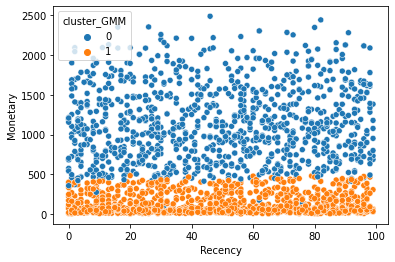

In [64]:
# Recency & Monetary
sns.scatterplot(x, z, hue=df_RFM['cluster_GMM'])
plt.show()

- Monetary 값이 큰 군집과 작은 군집으로 군집화 되었다.

In [65]:
from mpl_toolkits.mplot3d import Axes3D

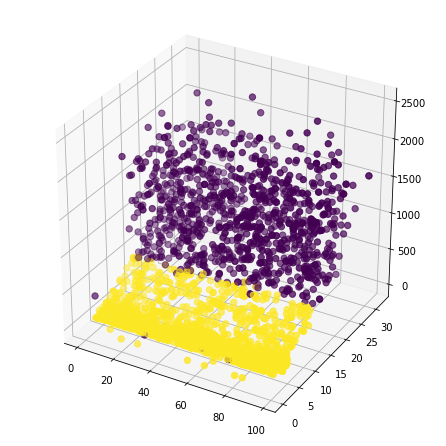

In [66]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# plot
ax.scatter(x, y, z, s=40, c=df_RFM['cluster_GMM'], marker='o')
plt.show()